In [74]:
import json
import numpy as np
import pandas as pd 
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)  

In [75]:
df = pd.read_csv("C:\\Data.csv")
df.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
1,1,F,N,Y,1,247500.0,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,-11380,-1540,1,0,0,1,Laborers,3.0,-5.0,1.0
2,2,M,Y,Y,0,450000.0,Working,Higher education,Married,House / apartment,-19087,-4434,1,0,1,0,Managers,2.0,-22.0,2.0
3,3,F,N,Y,0,202500.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15088,-2092,1,0,1,0,Sales staff,2.0,-37.0,0.0
4,4,F,Y,Y,0,157500.0,State servant,Higher education,Married,House / apartment,-15037,-2105,1,0,0,0,Managers,2.0,-26.0,2.0


In [76]:
dic_cd =  {'Working': 'code1',
           'Commercial associate':'code2',
           'Pensioner': 'code3',  
           'State servant': 'code4',
           'Student': 'code5'}

In [77]:
df['income_type'] = df['income_type'].apply(lambda x : dic_cd[x])

In [78]:
df_null = pd.DataFrame(df.isnull().sum(), columns=['null'])
df_null['null_ratio'] = df_null['null'] / len(df)
df_null.sort_values(by=['null_ratio'], ascending=False)

,null,null_ratio
occyp_type,8171,0.308841
index,0,0.000000
gender,0,0.000000
begin_month,0,0.000000
family_size,0,0.000000
email,0,0.000000
phone,0,0.000000
work_phone,0,0.000000
FLAG_MOBIL,0,0.000000
DAYS_EMPLOYED,0,0.000000


In [79]:
df['occyp_type'] = df['occyp_type'].fillna('etc')
df.isnull().sum()

index            0
gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [80]:
list_of_df = []

for i in df.columns :
 loof_df = pd.DataFrame({'val' : [i],
              'zero_cnt': df[df[i] == 0].count()[0]})
 list_of_df.append(loof_df)
 
df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge['zero_ratio'] = df_merge['zero_cnt'] / len(df)
df_merge.sort_values(by=['zero_ratio'], ascending = False)

,val,zero_cnt,zero_ratio
15,email,24042,0.908720
13,work_phone,20511,0.775258
14,phone,18672,0.705749
4,child_num,18340,0.693200
19,credit,3222,0.121783
18,begin_month,231,0.008731
0,index,1,0.000038
7,edu_type,0,0.000000
8,family_type,0,0.000000
9,house_type,0,0.000000


In [81]:
dic_cd_meta = {'code1' : 'Working',
               'code2' : 'Commercial associate',
               'code3' : 'Pensioner',  
               'code4' : 'State servant',
               'code5' : 'Student'}

df['income_type'] = df['income_type'].apply(lambda x : dic_cd_meta[x])
df['income_type'].head()

0    Commercial associate
1    Commercial associate
2                 Working
3    Commercial associate
4           State servant
Name: income_type, dtype: object

In [82]:
import numpy as np
import pandas as pd

numerical_list=[]
categorical_list=[]

for i in df.columns :
  if df[i].dtypes == 'O' :
    categorical_list.append(i)
  else :
    numerical_list.append(i)


print("numerical_list:", numerical_list)
print("categorical_list:", categorical_list)

numerical_list: ['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'FLAG_MOBIL', 'work_phone', 'phone', 'email', 'family_size', 'begin_month', 'credit']
categorical_list: ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type']


In [83]:
list_of_df = []

for i in numerical_list :
 loof_df = pd.DataFrame({'val' : [i],
              'nunique': df[i].nunique()})
 list_of_df.append(loof_df)
 
df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
0,index,26457
3,DAYS_BIRTH,6621
4,DAYS_EMPLOYED,3470
2,income_total,249
10,begin_month,61
9,family_size,10
1,child_num,9
11,credit,3
6,work_phone,2
7,phone,2


In [84]:
list_of_df = []

for i in categorical_list :
 loof_df = pd.DataFrame({'val' : [i],
              'nunique': df[i].nunique()})
 list_of_df.append(loof_df)
 
df_merge  = pd.concat(list_of_df).reset_index(drop=True)
df_merge.sort_values(by=['nunique'], ascending = False)

,val,nunique
7,occyp_type,19
6,house_type,6
3,income_type,5
4,edu_type,5
5,family_type,5
0,gender,2
1,car,2
2,reality,2


In [85]:
change_list = ['credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']

for i in change_list :
  numerical_list.remove(i)
  

for i in change_list :
  categorical_list.append(i)

print("numerical_list:", numerical_list)
print("categorical_list:", categorical_list)

numerical_list: ['index', 'child_num', 'income_total', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'family_size', 'begin_month']
categorical_list: ['gender', 'car', 'reality', 'income_type', 'edu_type', 'family_type', 'house_type', 'occyp_type', 'credit', 'work_phone', 'phone', 'email', 'FLAG_MOBIL']


In [86]:
df['credit'] = np.where(df['credit'] == 2, 1, 0)
print(df['credit'].value_counts())
print('')
print(df['credit'].value_counts(normalize=True))

credit
1    16968
0     9489
Name: count, dtype: int64

credit
1    0.641343
0    0.358657
Name: proportion, dtype: float64


In [87]:
eda_df = df.groupby('occyp_type')['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
eda_df.sort_values(by=['t_ratio'], ascending = False)

,occyp_type,cnt,t_cnt,t_ratio
5,HR staff,62,51,0.822581
16,Security staff,424,297,0.700472
13,Realty agents,63,44,0.698413
11,Medicine staff,864,590,0.682870
1,Cleaning staff,403,270,0.669975
9,Low-skill Laborers,127,84,0.661417
10,Managers,2167,1429,0.659437
4,Drivers,1575,1030,0.653968
18,etc,8171,5266,0.644474
3,Core staff,2646,1677,0.633787


In [88]:
!pip install optbinning

In [89]:
from optbinning import OptimalBinning

iv_df = []

for i in numerical_list :
  variable = i
  x = df[variable].values
  y = df.credit
  optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
  optb.fit(x, y)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                     'IV' : [v1.loc['Totals','IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop=True)
iv_df.sort_values(by=['IV'], ascending = False)

,val,IV
6,begin_month,1.006220
3,DAYS_BIRTH,0.011866
4,DAYS_EMPLOYED,0.007658
2,income_total,0.002783
5,family_size,0.001626
1,child_num,0.000981
0,index,0.000894


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -8.50)",21737,0.821597,6557,15180,0.698348,-0.25825,0.052583,0.006555
1,"[-8.50, -3.50)",3003,0.113505,1230,1773,0.590410,0.215537,0.005417,0.000676
2,"[-3.50, inf)",1717,0.064898,1702,15,0.008736,5.312705,0.948220,0.059678
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,1.006220,0.066909


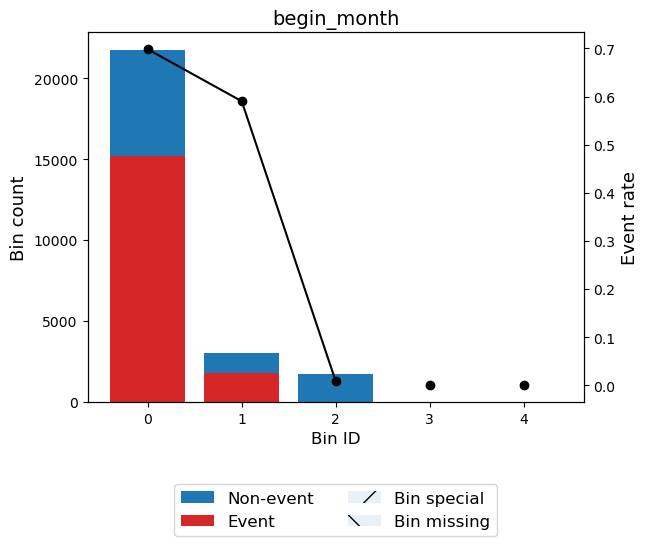

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['default'])

variable = 'begin_month'
x = df[variable].values
y = df.credit

optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
optb.fit(x, y)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

count    26457.000000
mean       -26.123294
std         16.559550
min        -60.000000
25%        -39.000000
50%        -24.000000
75%        -12.000000
max          0.000000
Name: begin_month, dtype: float64


C:\Users\Yechan\AppData\Local\Temp\ipykernel_75128\3148137765.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['begin_month']);


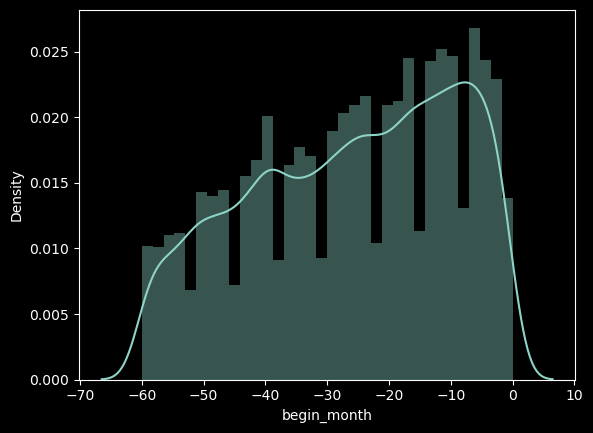

In [91]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

print(df['begin_month'].describe())
sns.distplot(df['begin_month']);

,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -13481.50)",17769,0.671618,6112,11657,0.656030,-0.064457,0.002764,0.000345
1,"[-13481.50, -9971.50)",7138,0.269796,2692,4446,0.622864,0.079476,0.001723,0.000215
2,"[-9971.50, inf)",1550,0.058586,685,865,0.558065,0.347885,0.007379,0.000918
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,26457,1.000000,9489,16968,0.641343,,0.011866,0.001478


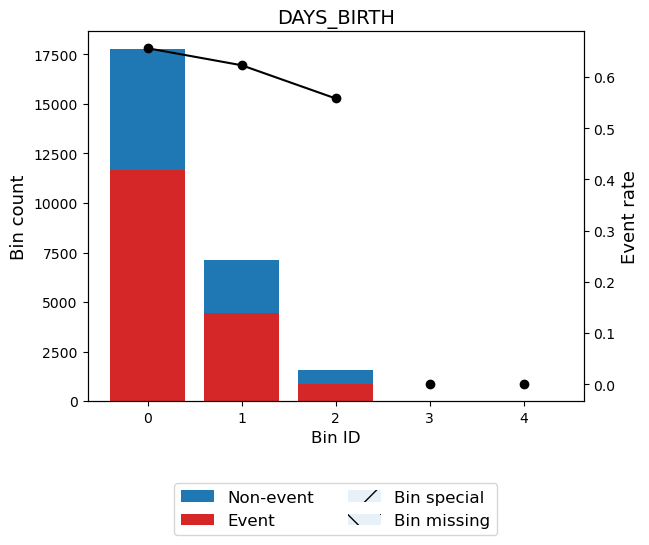

In [92]:
plt.style.use(['default'])
variable = 'DAYS_BIRTH'
x = df[variable].values
y = df.credit

optb = OptimalBinning(name=variable, dtype="numerical", solver="cp", max_n_prebins=3)
optb.fit(x, y)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

count    26457.000000
mean    -15958.053899
std       4201.589022
min     -25152.000000
25%     -19431.000000
50%     -15547.000000
75%     -12446.000000
max      -7705.000000
Name: DAYS_BIRTH, dtype: float64


C:\Users\Yechan\AppData\Local\Temp\ipykernel_75128\2502373225.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DAYS_BIRTH']);


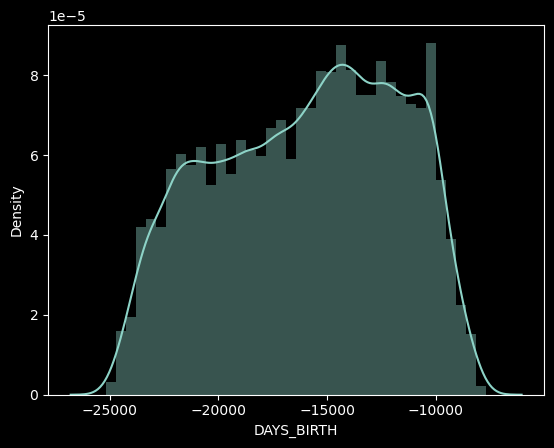

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

print(df['DAYS_BIRTH'].describe())
sns.distplot(df['DAYS_BIRTH']);

In [94]:
x_transform_bins = optb.transform(df['DAYS_BIRTH'], metric="bins")
df_bin = pd.DataFrame(df['credit'])
df_bin['bin'] = x_transform_bins
df_bin.head()

,credit,bin
0,0,"(-inf, -13481.50)"
1,0,"[-13481.50, -9971.50)"
2,1,"(-inf, -13481.50)"
3,0,"(-inf, -13481.50)"
4,1,"(-inf, -13481.50)"


In [95]:
eda_df = df_bin.groupby('bin')['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
eda_df

,bin,cnt,t_cnt,t_ratio
0,"(-inf, -13481.50)",17769,11657,0.656030
1,"[-13481.50, -9971.50)",7138,4446,0.622864
2,"[-9971.50, inf)",1550,865,0.558065


In [96]:
df[categorical_list].head()

,gender,car,reality,income_type,edu_type,family_type,house_type,occyp_type,credit,work_phone,phone,email,FLAG_MOBIL
0,F,N,N,Commercial associate,Higher education,Married,Municipal apartment,etc,0,0,0,0,1
1,F,N,Y,Commercial associate,Secondary / secondary special,Civil marriage,House / apartment,Laborers,0,0,0,1,1
2,M,Y,Y,Working,Higher education,Married,House / apartment,Managers,1,0,1,0,1
3,F,N,Y,Commercial associate,Secondary / secondary special,Married,House / apartment,Sales staff,0,0,1,0,1
4,F,Y,Y,State servant,Higher education,Married,House / apartment,Managers,1,0,0,0,1


C:\Users\Yechan\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


,gender,cnt,t_cnt,t_ratio
0,F,17697,11329,0.640165
1,M,8760,5639,0.643721


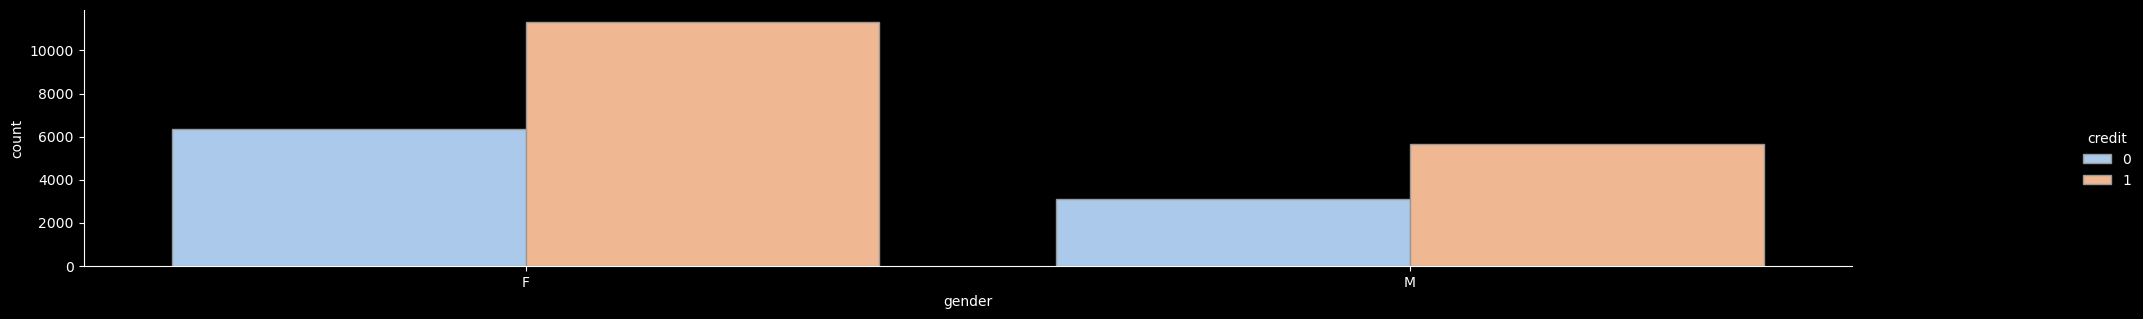

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use(['dark_background'])

val = 'gender'

sns.catplot(x = val, hue="credit", kind="count",palette="pastel", edgecolor=".6",data=df);
plt.gcf().set_size_inches(25, 3)

eda_df = df.groupby(val)['credit'].agg(cnt =('count'), t_cnt=('sum')).reset_index()
eda_df['t_ratio'] = eda_df['t_cnt'] / eda_df['cnt']
display(eda_df)

split points :  [array(['Waiters/barmen staff', 'IT staff', 'Secretaries', 'Accountants',
       'High skill tech staff'], dtype=object), array(['Sales staff'], dtype=object), array(['Private service staff', 'Laborers'], dtype=object), array(['Cooking staff', 'Core staff'], dtype=object), array(['etc'], dtype=object), array(['Drivers'], dtype=object), array(['Managers', 'Low-skill Laborers', 'Cleaning staff'], dtype=object), array(['Medicine staff', 'Realty agents', 'Security staff', 'HR staff'],
      dtype=object)]


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[Waiters/barmen staff, IT staff, Secretaries, ...",2204,0.083305,856,1348,0.611615,0.127089,0.001368,0.000171
1,[Sales staff],2539,0.095967,943,1596,0.628594,0.055006,0.000293,0.000037
2,"[Private service staff, Laborers]",4755,0.179726,1758,2997,0.630284,0.047761,0.000413,0.000052
3,"[Cooking staff, Core staff]",3103,0.117285,1137,1966,0.633580,0.033588,0.000133,0.000017
4,[etc],8171,0.308841,2905,5266,0.644474,-0.013642,0.000057,0.000007
5,[Drivers],1575,0.059531,545,1030,0.653968,-0.055332,0.000181,0.000023
6,"[Managers, Low-skill Laborers, Cleaning staff]",2697,0.101939,914,1783,0.661105,-0.087026,0.000762,0.000095
7,"[Medicine staff, Realty agents, Security staff...",1413,0.053407,431,982,0.694975,-0.242287,0.003017,0.000376
8,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
9,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000


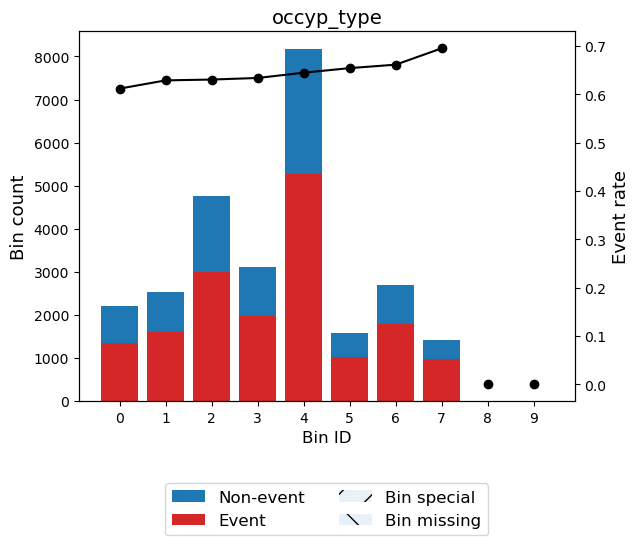

In [97]:
plt.style.use(['default'])

variable = 'occyp_type'
x = df[variable].values
y = df.credit

optb = OptimalBinning(name=variable, dtype="categorical", solver="cp")
optb.fit(x, y)
print("split points : ", optb.splits)

binning_table = optb.binning_table
v1 = binning_table.build()

display(v1)
binning_table.plot(metric="event_rate")

In [98]:
optb.splits[7]

array(['Medicine staff', 'Realty agents', 'Security staff', 'HR staff'],
      dtype=object)

In [99]:
from optbinning import OptimalBinning

iv_df = []

for i in categorical_list :
  variable = i
  x = df[variable].values
  y = df.credit

  optb = OptimalBinning(name=variable, dtype="categorical")
  optb.fit(x, y)

  binning_table = optb.binning_table
  v1 = binning_table.build()

  loop_df = pd.DataFrame({'val' : variable,
                     'IV' : [v1.loc['Totals','IV']]})
  iv_df.append(loop_df)

iv_df = pd.concat(iv_df).reset_index(drop=True)
iv_df.sort_values(by=['IV'], ascending = False)

,val,IV
7,occyp_type,0.006224
5,family_type,0.004767
3,income_type,0.001783
6,house_type,0.001601
4,edu_type,0.001151
2,reality,0.001116
11,email,0.000967
1,car,0.000858
10,phone,0.000441
9,work_phone,0.000058


In [100]:
from sklearn.model_selection import train_test_split

X = df.drop(['index', 'credit', 'FLAG_MOBIL'], axis=1)
Y = df['credit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [101]:
df[categorical_list].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   gender       26457 non-null  object
 1   car          26457 non-null  object
 2   reality      26457 non-null  object
 3   income_type  26457 non-null  object
 4   edu_type     26457 non-null  object
 5   family_type  26457 non-null  object
 6   house_type   26457 non-null  object
 7   occyp_type   26457 non-null  object
 8   credit       26457 non-null  int32 
 9   work_phone   26457 non-null  int64 
 10  phone        26457 non-null  int64 
 11  email        26457 non-null  int64 
 12  FLAG_MOBIL   26457 non-null  int64 
dtypes: int32(1), int64(4), object(8)
memory usage: 2.5+ MB


In [102]:
categorical_list.remove('credit')
categorical_list.remove('work_phone')
categorical_list.remove('phone')
categorical_list.remove('email')
categorical_list.remove('FLAG_MOBIL')

In [103]:
from sklearn.preprocessing import OneHotEncoder

for col in categorical_list :
  encoder = OneHotEncoder()
  encoder.fit(x_train[[col]])
  onehot_train = pd.DataFrame(encoder.transform(x_train[[col]]).toarray(), columns = encoder.get_feature_names_out(), index=x_train.index)
  onehot_test = pd.DataFrame(encoder.transform(x_test[[col]]).toarray(), columns = encoder.get_feature_names_out(), index=x_test.index)

  x_train = pd.concat([x_train,onehot_train], axis = 1).drop(columns = [col])
  x_test = pd.concat([x_test,onehot_test], axis = 1).drop(columns = [col])

In [104]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train_sc = scaler.fit_transform(x_train)
x_test_sc = scaler.transform(x_test)

In [105]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression()
LR.fit(x_train_sc, y_train)

LogisticRegression()

In [106]:
from sklearn.metrics import classification_report

y_pred_train = LR.predict(x_train_sc)
y_pred_test = LR.predict(x_test_sc)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.12      0.20      6642
           1       0.66      0.97      0.79     11877

    accuracy                           0.67     18519
   macro avg       0.68      0.55      0.50     18519
weighted avg       0.68      0.67      0.58     18519

              precision    recall  f1-score   support

           0       0.69      0.12      0.21      2847
           1       0.66      0.97      0.79      5091

    accuracy                           0.67      7938
   macro avg       0.68      0.55      0.50      7938
weighted avg       0.67      0.67      0.58      7938



In [107]:
from sklearn.metrics import roc_auc_score

y_pred_train_proba = LR.predict_proba(x_train_sc)[:, 1] 
y_pred_test_proba = LR.predict_proba(x_test_sc)[:, 1] 


roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.6198037183144698
roc_score_test : 0.6195600106167505


In [114]:
df_comparison = pd.DataFrame(columns = ['model', 'f1_train', 'f1_test', 'AUC_train', 'AUC_test'])
df_comparison.columns = ['model', 'f1_train', 'f1_test', 'AUC_train', 'AUC_test']
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test


In [120]:
import sklearn.metrics as metrics

lr_re = pd.DataFrame({ 'model' : ['LR'],
                      'f1_train' :  metrics.f1_score(y_train,y_pred_train),
                      'f1_test' : metrics.f1_score(y_test,y_pred_test),
                      'AUC_train' : roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : roc_auc_score(y_test, y_pred_test_proba),}
                    )

df_comparison = pd.concat([df_comparison,lr_re])
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.61956


In [121]:
from sklearn.model_selection import train_test_split

X = df.drop(['index', 'credit', 'FLAG_MOBIL'], axis=1)
Y = df['credit']

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=1234)

print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)

(18519, 17)
(18519,)
(7938, 17)
(7938,)


In [122]:
from sklearn.preprocessing import LabelEncoder

for col in categorical_list :
  encoder = LabelEncoder()
  encoder.fit(x_train[[col]])
  
  x_train[col] = encoder.transform(x_train[col]) 
  x_test[col] = encoder.transform(x_test[col]) 

C:\Users\Yechan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yechan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yechan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Yechan\anaconda3\Lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

In [123]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.98      0.97      0.97      6642
           1       0.98      0.99      0.99     11877

    accuracy                           0.98     18519
   macro avg       0.98      0.98      0.98     18519
weighted avg       0.98      0.98      0.98     18519

              precision    recall  f1-score   support

           0       0.67      0.52      0.58      2847
           1       0.76      0.86      0.80      5091

    accuracy                           0.73      7938
   macro avg       0.71      0.69      0.69      7938
weighted avg       0.73      0.73      0.72      7938



In [124]:
y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.9991563252333711
roc_score_test : 0.756262782376553


In [125]:
!pip install bayesian-optimization

  Obtaining dependency information for bayesian-optimization from https://files.pythonhosted.org/packages/45/cf/3016b660afca02c6ecca3c1cc6d8df3b8f1a6ff4878103204d0aa6b4c769/bayesian_optimization-1.4.3-py3-none-any.whl.metadata


In [126]:
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score


def model_evaluate(n_estimators, maxDepth):
    clf = RandomForestClassifier(
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)
    
    
def bayesOpt(x_train, y_train):
    clfBO = BayesianOptimization(model_evaluate, {'n_estimators':  (100, 200),
                                                  'maxDepth': (2, 4)
                                                 })
    clfBO.maximize(init_points=5, n_iter=10)
    print(clfBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | maxDepth  | n_esti... |
-------------------------------------------------
| 1         | 0.6257    | 2.355     | 108.4     |
| 2         | 0.6337    | 3.272     | 125.6     |
| 3         | 0.6235    | 2.548     | 163.6     |
| 4         | 0.6339    | 3.364     | 103.9     |
| 5         | 0.6257    | 2.694     | 129.8     |
| 6         | 0.6338    | 3.277     | 125.6     |
| 7         | 0.6324    | 3.943     | 126.5     |
| 8         | 0.626     | 2.531     | 126.5     |
| 9         | 0.6322    | 3.952     | 125.7     |
| 10        | 0.6329    | 3.881     | 103.2     |
| 11        | 0.6247    | 2.785     | 103.1     |
| 12        | 0.6396    | 4.0       | 104.0     |
| 13        | 0.6336    | 3.957     | 104.6     |
| 14        | 0.631     | 3.922     | 103.7     |
| 15        | 0.6317    | 3.761     | 104.2     |
[{'target': 0.6256636613692732, 'params': {'maxDepth': 2.355256968008677, 'n_estimators': 108.41296750497727}}, {'target': 0.6336677687497385, 'params

In [127]:
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
from sklearn.metrics import roc_auc_score

rfc = RandomForestClassifier(n_estimators=147, max_depth = 4, random_state= 1121)
rfc.fit(x_train, y_train)

y_pred_train = rfc.predict(x_train)
y_pred_test = rfc.predict(x_test)

y_pred_train_proba = rfc.predict_proba(x_train)[:, 1] 
y_pred_test_proba = rfc.predict_proba(x_test)[:, 1] 


rfc_re = pd.DataFrame({ 'model' : ['RFC(BO)'],
                      'f1_train' :  metrics.f1_score(y_train,y_pred_train),
                      'f1_test' : metrics.f1_score(y_test,y_pred_test),
                      'AUC_train' : roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : roc_auc_score(y_test, y_pred_test_proba),}
                    )

df_comparison = pd.concat([df_comparison,rfc_re])
df_comparison.reset_index(drop=True, inplace = True)

In [128]:
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.61956
1,RFC(BO),0.812626,0.813795,0.663180,0.64457


In [130]:
!pip install lightgbm

  Obtaining dependency information for lightgbm from https://files.pythonhosted.org/packages/e1/4c/4685ccfae9806f561de716e32549190c1f533dde5bcadaf83bdf23972cf0/lightgbm-4.3.0-py3-none-win_amd64.whl.metadata
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
    --------------------------------------- 0.0/1.3 MB 660.6 kB/s eta 0:00:02
   ---------- ----------------------------- 0.3/1.3 MB 4.2 MB/s eta 0:00:01
   --------------------- ------------------ 0.7/1.3 MB 6.5 MB/s eta 0:00:01
   ------------------------------- -------- 1.1/1.3 MB 7.5 MB/s eta 0:00:01
   ---------------------------------- ----- 1.2/1.3 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 5.7 MB/s eta 0:00:00


In [131]:
import lightgbm as lgbm
from lightgbm import LGBMClassifier

LGBM = lgbm.LGBMClassifier()
LGBM.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 11877, number of negative: 6642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001058 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.641341 -> initscore=0.581191
[LightGBM] [Info] Start training from score 0.581191


LGBMClassifier()

In [132]:
y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

print(classification_report(y_train, y_pred_train))
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.95      0.32      0.47      6642
           1       0.72      0.99      0.83     11877

    accuracy                           0.75     18519
   macro avg       0.83      0.65      0.65     18519
weighted avg       0.80      0.75      0.71     18519

              precision    recall  f1-score   support

           0       0.84      0.27      0.41      2847
           1       0.71      0.97      0.82      5091

    accuracy                           0.72      7938
   macro avg       0.77      0.62      0.61      7938
weighted avg       0.75      0.72      0.67      7938



In [133]:
y_pred_train_proba = LGBM.predict_proba(x_train)[:, 1] 
y_pred_test_proba = LGBM.predict_proba(x_test)[:, 1] 

roc_score_train = roc_auc_score(y_train, y_pred_train_proba)
roc_score_test = roc_auc_score(y_test, y_pred_test_proba)

print("roc_score_train :", roc_score_train)
print("roc_score_test :", roc_score_test)

roc_score_train : 0.850746936435714
roc_score_test : 0.719803027126184


In [134]:
import numpy as np
from bayes_opt import BayesianOptimization
from sklearn.model_selection import cross_val_score

def lgb_evaluate(learning_rate, n_estimators, maxDepth):
    clf = LGBMClassifier(
        objective = 'binary',
        metric= 'auc',
        learning_rate=float(learning_rate),
        n_estimators= int(n_estimators),
        max_depth= int(maxDepth))
    scores = cross_val_score(clf, x_train, y_train, cv=5, scoring='roc_auc')
    return np.mean(scores)
    
def bayesOpt(train_x, train_y):
    lgbBO = BayesianOptimization(lgb_evaluate, {'learning_rate' : (0.01, 0.05),                                               
                                                'n_estimators': (100, 200),
                                                'maxDepth': (2, 4)  
                                               })
    lgbBO.maximize(init_points=5, n_iter=10)
    print(lgbBO.res)

bayesOpt(x_train, y_train)

|   iter    |  target   | learni... | maxDepth  | n_esti... |
-------------------------------------------------------------
[LightGBM] [Info] Number of positive: 9501, number of negative: 5314
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000665 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 750
[LightGBM] [Info] Number of data points in the train set: 14815, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.641309 -> initscore=0.581052
[LightGBM] [Info] Start training from score 0.581052
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [135]:
from lightgbm import LGBMClassifier

LGBM = LGBMClassifier(learning_rate=0.03, n_estimators=200, max_depth=4, random_state=1234)
LGBM.fit(x_train, y_train)

y_pred_train = LGBM.predict(x_train)
y_pred_test = LGBM.predict(x_test)

y_pred_train_proba = LGBM.predict_proba(x_train)[:, 1] 
y_pred_test_proba = LGBM.predict_proba(x_test)[:, 1] 

lgbm_re = pd.DataFrame({ 'model' : ['LGBM(BO)'],
                      'f1_train' :  metrics.f1_score(y_train,y_pred_train),
                      'f1_test' : metrics.f1_score(y_test,y_pred_test),
                      'AUC_train' : roc_auc_score(y_train, y_pred_train_proba),
                      'AUC_test' : roc_auc_score(y_test, y_pred_test_proba),}
                    )

df_comparison = pd.concat([df_comparison,lgbm_re])
df_comparison.reset_index(drop=True, inplace = True)

[LightGBM] [Info] Number of positive: 11877, number of negative: 6642
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000858 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 763
[LightGBM] [Info] Number of data points in the train set: 18519, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.641341 -> initscore=0.581191
[LightGBM] [Info] Start training from score 0.581191
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -

In [136]:
df_comparison

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.619560
1,RFC(BO),0.812626,0.813795,0.663180,0.644570
2,LGBM(BO),0.814061,0.813647,0.686329,0.656128


In [137]:
df_comparison.style.background_gradient(cmap='coolwarm', low=1)

,model,f1_train,f1_test,AUC_train,AUC_test
0,LR,0.788823,0.788082,0.619804,0.619560
1,RFC(BO),0.812626,0.813795,0.663180,0.644570
2,LGBM(BO),0.814061,0.813647,0.686329,0.656128
